# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [3]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt

## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [4]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [6]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [17]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from sklearn import preprocessing
from livelossplot import PlotLossesKeras

In [9]:
output_var = 1
print(output_var, ' output variables')

dims = xTrain.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [12]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

Building model...
Model variables:  7


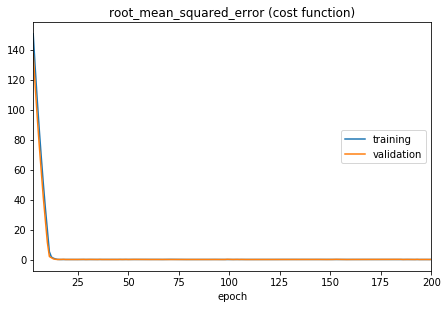

root_mean_squared_error (cost function):
training   (min:    0.122, max:  206.483, cur:    0.128)
validation (min:    0.123, max:  189.639, cur:    0.182)
--------------------------->
150/150 [==============================] - 0s 13us/step
root mean squared error 0.18214946011702218
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
____________________________________________________________

In [18]:
print("Building model...")

print('Model variables: ', dims)
K.clear_session()

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

model.add(Dense(5, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))


learning_rate = 0.01
#op = opts.SGD(lr=learning_rate)
#op= 'rmsprop'
op = 'adam'

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
model.compile(loss = root_mean_squared_error
             ,optimizer = op,
             )

model.fit(xTrain, yTrain,
          verbose=2, 
          epochs=200, 
          validation_data=[xTest,yTest],
          callbacks=[PlotLossesKeras()])

print("--------------------------->")
score = model.evaluate(xTest, yTest)
print('root mean squared error',score)
print(model.summary())

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

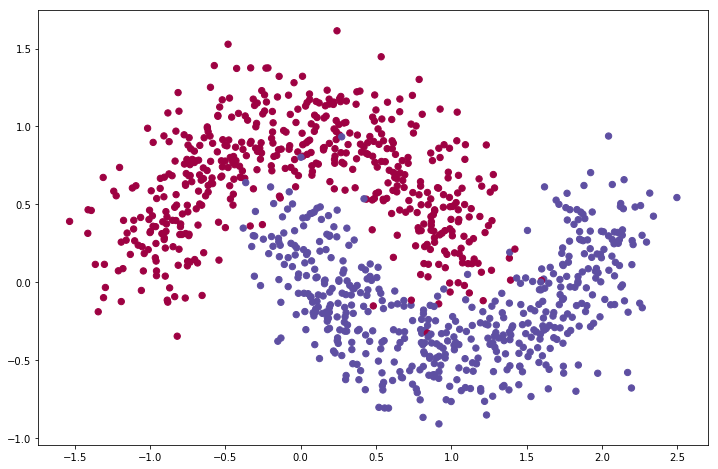

In [22]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [23]:
X1 = [X[0] for X in x_train]
X2 = [X[1] for X in x_train]

X_ = np.array([X1,X2])
Y_ = np.array([y_train])

In [24]:
# Scaling data
std_scale = preprocessing.StandardScaler().fit(X_)

In [25]:
X = pd.DataFrame({'X1':X1,'X2':X2})
Y = pd.DataFrame({'Y':y_train})

In [27]:
X.head()

,X1,X2
0,0.553569,-0.375962
1,0.981059,-0.284679
2,1.873453,0.436822
3,0.477478,0.808750
4,0.148796,-0.088704


In [28]:
Y.head()

,Y
0,1
1,1
2,1
3,0
4,1


In [29]:
dims = X.shape[1]

In [35]:
print("Building model...")

print('Model variables: ', dims)
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(dims,)))

model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X, Y, verbose=2,epochs=2000)

Building model...
Model variables:  2
Epoch 1/2000
 - 1s - loss: 0.6597
Epoch 2/2000
 - 0s - loss: 0.6273
Epoch 3/2000
 - 0s - loss: 0.5914
Epoch 4/2000
 - 0s - loss: 0.5538
Epoch 5/2000
 - 0s - loss: 0.5171
Epoch 6/2000
 - 0s - loss: 0.4836
Epoch 7/2000
 - 0s - loss: 0.4543
Epoch 8/2000
 - 0s - loss: 0.4285
Epoch 9/2000
 - 0s - loss: 0.4059
Epoch 10/2000
 - 0s - loss: 0.3855
Epoch 11/2000
 - 0s - loss: 0.3669
Epoch 12/2000
 - 0s - loss: 0.3514
Epoch 13/2000
 - 0s - loss: 0.3361
Epoch 14/2000
 - 0s - loss: 0.3241
Epoch 15/2000
 - 0s - loss: 0.3136
Epoch 16/2000
 - 0s - loss: 0.3055
Epoch 17/2000
 - 0s - loss: 0.2991
Epoch 18/2000
 - 0s - loss: 0.2945
Epoch 19/2000
 - 0s - loss: 0.2909
Epoch 20/2000
 - 0s - loss: 0.2888
Epoch 21/2000
 - 0s - loss: 0.2865
Epoch 22/2000
 - 0s - loss: 0.2864
Epoch 23/2000
 - 0s - loss: 0.2840
Epoch 24/2000
 - 0s - loss: 0.2841
Epoch 25/2000
 - 0s - loss: 0.2833
Epoch 26/2000
 - 0s - loss: 0.2834
Epoch 27/2000
 - 0s - loss: 0.2821
Epoch 28/2000
 - 0s - loss

Epoch 231/2000
 - 0s - loss: 0.2706
Epoch 232/2000
 - 0s - loss: 0.2707
Epoch 233/2000
 - 0s - loss: 0.2714
Epoch 234/2000
 - 0s - loss: 0.2711
Epoch 235/2000
 - 0s - loss: 0.2716
Epoch 236/2000
 - 0s - loss: 0.2710
Epoch 237/2000
 - 0s - loss: 0.2710
Epoch 238/2000
 - 0s - loss: 0.2705
Epoch 239/2000
 - 0s - loss: 0.2707
Epoch 240/2000
 - 0s - loss: 0.2710
Epoch 241/2000
 - 0s - loss: 0.2710
Epoch 242/2000
 - 0s - loss: 0.2718
Epoch 243/2000
 - 0s - loss: 0.2708
Epoch 244/2000
 - 0s - loss: 0.2707
Epoch 245/2000
 - 0s - loss: 0.2709
Epoch 246/2000
 - 0s - loss: 0.2709
Epoch 247/2000
 - 0s - loss: 0.2711
Epoch 248/2000
 - 0s - loss: 0.2710
Epoch 249/2000
 - 0s - loss: 0.2710
Epoch 250/2000
 - 0s - loss: 0.2712
Epoch 251/2000
 - 0s - loss: 0.2706
Epoch 252/2000
 - 0s - loss: 0.2710
Epoch 253/2000
 - 0s - loss: 0.2713
Epoch 254/2000
 - 0s - loss: 0.2708
Epoch 255/2000
 - 0s - loss: 0.2712
Epoch 256/2000
 - 0s - loss: 0.2707
Epoch 257/2000
 - 0s - loss: 0.2704
Epoch 258/2000
 - 0s - loss:

Epoch 459/2000
 - 0s - loss: 0.2715
Epoch 460/2000
 - 0s - loss: 0.2705
Epoch 461/2000
 - 0s - loss: 0.2704
Epoch 462/2000
 - 0s - loss: 0.2707
Epoch 463/2000
 - 0s - loss: 0.2717
Epoch 464/2000
 - 0s - loss: 0.2708
Epoch 465/2000
 - 0s - loss: 0.2710
Epoch 466/2000
 - 0s - loss: 0.2703
Epoch 467/2000
 - 0s - loss: 0.2711
Epoch 468/2000
 - 0s - loss: 0.2707
Epoch 469/2000
 - 0s - loss: 0.2705
Epoch 470/2000
 - 0s - loss: 0.2709
Epoch 471/2000
 - 0s - loss: 0.2717
Epoch 472/2000
 - 0s - loss: 0.2704
Epoch 473/2000
 - 0s - loss: 0.2706
Epoch 474/2000
 - 0s - loss: 0.2705
Epoch 475/2000
 - 0s - loss: 0.2708
Epoch 476/2000
 - 0s - loss: 0.2708
Epoch 477/2000
 - 0s - loss: 0.2709
Epoch 478/2000
 - 0s - loss: 0.2707
Epoch 479/2000
 - 0s - loss: 0.2712
Epoch 480/2000
 - 0s - loss: 0.2731
Epoch 481/2000
 - 0s - loss: 0.2704
Epoch 482/2000
 - 0s - loss: 0.2706
Epoch 483/2000
 - 0s - loss: 0.2708
Epoch 484/2000
 - 0s - loss: 0.2704
Epoch 485/2000
 - 0s - loss: 0.2708
Epoch 486/2000
 - 0s - loss:

Epoch 687/2000
 - 0s - loss: 0.2709
Epoch 688/2000
 - 0s - loss: 0.2715
Epoch 689/2000
 - 0s - loss: 0.2704
Epoch 690/2000
 - 0s - loss: 0.2706
Epoch 691/2000
 - 0s - loss: 0.2717
Epoch 692/2000
 - 0s - loss: 0.2706
Epoch 693/2000
 - 0s - loss: 0.2705
Epoch 694/2000
 - 0s - loss: 0.2704
Epoch 695/2000
 - 0s - loss: 0.2710
Epoch 696/2000
 - 0s - loss: 0.2715
Epoch 697/2000
 - 0s - loss: 0.2703
Epoch 698/2000
 - 0s - loss: 0.2708
Epoch 699/2000
 - 0s - loss: 0.2710
Epoch 700/2000
 - 0s - loss: 0.2720
Epoch 701/2000
 - 0s - loss: 0.2714
Epoch 702/2000
 - 0s - loss: 0.2720
Epoch 703/2000
 - 0s - loss: 0.2704
Epoch 704/2000
 - 0s - loss: 0.2706
Epoch 705/2000
 - 0s - loss: 0.2708
Epoch 706/2000
 - 0s - loss: 0.2706
Epoch 707/2000
 - 0s - loss: 0.2705
Epoch 708/2000
 - 0s - loss: 0.2707
Epoch 709/2000
 - 0s - loss: 0.2703
Epoch 710/2000
 - 0s - loss: 0.2714
Epoch 711/2000
 - 0s - loss: 0.2706
Epoch 712/2000
 - 0s - loss: 0.2708
Epoch 713/2000
 - 0s - loss: 0.2708
Epoch 714/2000
 - 0s - loss:

Epoch 915/2000
 - 0s - loss: 0.2706
Epoch 916/2000
 - 0s - loss: 0.2709
Epoch 917/2000
 - 0s - loss: 0.2715
Epoch 918/2000
 - 0s - loss: 0.2714
Epoch 919/2000
 - 0s - loss: 0.2714
Epoch 920/2000
 - 0s - loss: 0.2706
Epoch 921/2000
 - 0s - loss: 0.2710
Epoch 922/2000
 - 0s - loss: 0.2709
Epoch 923/2000
 - 0s - loss: 0.2705
Epoch 924/2000
 - 0s - loss: 0.2706
Epoch 925/2000
 - 0s - loss: 0.2706
Epoch 926/2000
 - 0s - loss: 0.2710
Epoch 927/2000
 - 0s - loss: 0.2705
Epoch 928/2000
 - 0s - loss: 0.2738
Epoch 929/2000
 - 0s - loss: 0.2709
Epoch 930/2000
 - 0s - loss: 0.2711
Epoch 931/2000
 - 0s - loss: 0.2712
Epoch 932/2000
 - 0s - loss: 0.2705
Epoch 933/2000
 - 0s - loss: 0.2706
Epoch 934/2000
 - 0s - loss: 0.2704
Epoch 935/2000
 - 0s - loss: 0.2703
Epoch 936/2000
 - 0s - loss: 0.2707
Epoch 937/2000
 - 0s - loss: 0.2710
Epoch 938/2000
 - 0s - loss: 0.2715
Epoch 939/2000
 - 0s - loss: 0.2722
Epoch 940/2000
 - 0s - loss: 0.2703
Epoch 941/2000
 - 0s - loss: 0.2704
Epoch 942/2000
 - 0s - loss:

Epoch 1139/2000
 - 0s - loss: 0.2703
Epoch 1140/2000
 - 0s - loss: 0.2706
Epoch 1141/2000
 - 0s - loss: 0.2704
Epoch 1142/2000
 - 0s - loss: 0.2705
Epoch 1143/2000
 - 0s - loss: 0.2705
Epoch 1144/2000
 - 0s - loss: 0.2708
Epoch 1145/2000
 - 0s - loss: 0.2703
Epoch 1146/2000
 - 0s - loss: 0.2712
Epoch 1147/2000
 - 0s - loss: 0.2705
Epoch 1148/2000
 - 0s - loss: 0.2706
Epoch 1149/2000
 - 0s - loss: 0.2704
Epoch 1150/2000
 - 0s - loss: 0.2712
Epoch 1151/2000
 - 0s - loss: 0.2709
Epoch 1152/2000
 - 0s - loss: 0.2703
Epoch 1153/2000
 - 0s - loss: 0.2707
Epoch 1154/2000
 - 0s - loss: 0.2711
Epoch 1155/2000
 - 0s - loss: 0.2706
Epoch 1156/2000
 - 0s - loss: 0.2707
Epoch 1157/2000
 - 0s - loss: 0.2711
Epoch 1158/2000
 - 0s - loss: 0.2707
Epoch 1159/2000
 - 0s - loss: 0.2708
Epoch 1160/2000
 - 0s - loss: 0.2715
Epoch 1161/2000
 - 0s - loss: 0.2705
Epoch 1162/2000
 - 0s - loss: 0.2713
Epoch 1163/2000
 - 0s - loss: 0.2705
Epoch 1164/2000
 - 0s - loss: 0.2709
Epoch 1165/2000
 - 0s - loss: 0.2716
E

Epoch 1361/2000
 - 0s - loss: 0.2703
Epoch 1362/2000
 - 0s - loss: 0.2708
Epoch 1363/2000
 - 0s - loss: 0.2705
Epoch 1364/2000
 - 0s - loss: 0.2703
Epoch 1365/2000
 - 0s - loss: 0.2704
Epoch 1366/2000
 - 0s - loss: 0.2710
Epoch 1367/2000
 - 0s - loss: 0.2707
Epoch 1368/2000
 - 0s - loss: 0.2705
Epoch 1369/2000
 - 0s - loss: 0.2708
Epoch 1370/2000
 - 0s - loss: 0.2703
Epoch 1371/2000
 - 0s - loss: 0.2705
Epoch 1372/2000
 - 0s - loss: 0.2705
Epoch 1373/2000
 - 0s - loss: 0.2702
Epoch 1374/2000
 - 0s - loss: 0.2706
Epoch 1375/2000
 - 0s - loss: 0.2711
Epoch 1376/2000
 - 0s - loss: 0.2715
Epoch 1377/2000
 - 0s - loss: 0.2708
Epoch 1378/2000
 - 0s - loss: 0.2704
Epoch 1379/2000
 - 0s - loss: 0.2710
Epoch 1380/2000
 - 0s - loss: 0.2705
Epoch 1381/2000
 - 0s - loss: 0.2704
Epoch 1382/2000
 - 0s - loss: 0.2703
Epoch 1383/2000
 - 0s - loss: 0.2706
Epoch 1384/2000
 - 0s - loss: 0.2706
Epoch 1385/2000
 - 0s - loss: 0.2707
Epoch 1386/2000
 - 0s - loss: 0.2705
Epoch 1387/2000
 - 0s - loss: 0.2706
E

Epoch 1583/2000
 - 0s - loss: 0.2703
Epoch 1584/2000
 - 0s - loss: 0.2724
Epoch 1585/2000
 - 0s - loss: 0.2704
Epoch 1586/2000
 - 0s - loss: 0.2710
Epoch 1587/2000
 - 0s - loss: 0.2705
Epoch 1588/2000
 - 0s - loss: 0.2715
Epoch 1589/2000
 - 0s - loss: 0.2705
Epoch 1590/2000
 - 0s - loss: 0.2712
Epoch 1591/2000
 - 0s - loss: 0.2710
Epoch 1592/2000
 - 0s - loss: 0.2721
Epoch 1593/2000
 - 0s - loss: 0.2707
Epoch 1594/2000
 - 0s - loss: 0.2707
Epoch 1595/2000
 - 0s - loss: 0.2716
Epoch 1596/2000
 - 0s - loss: 0.2709
Epoch 1597/2000
 - 0s - loss: 0.2705
Epoch 1598/2000
 - 0s - loss: 0.2706
Epoch 1599/2000
 - 0s - loss: 0.2703
Epoch 1600/2000
 - 0s - loss: 0.2709
Epoch 1601/2000
 - 0s - loss: 0.2720
Epoch 1602/2000
 - 0s - loss: 0.2708
Epoch 1603/2000
 - 0s - loss: 0.2700
Epoch 1604/2000
 - 0s - loss: 0.2715
Epoch 1605/2000
 - 0s - loss: 0.2714
Epoch 1606/2000
 - 0s - loss: 0.2712
Epoch 1607/2000
 - 0s - loss: 0.2705
Epoch 1608/2000
 - 0s - loss: 0.2711
Epoch 1609/2000
 - 0s - loss: 0.2702
E

Epoch 1805/2000
 - 0s - loss: 0.2710
Epoch 1806/2000
 - 0s - loss: 0.2704
Epoch 1807/2000
 - 0s - loss: 0.2709
Epoch 1808/2000
 - 0s - loss: 0.2705
Epoch 1809/2000
 - 0s - loss: 0.2712
Epoch 1810/2000
 - 0s - loss: 0.2717
Epoch 1811/2000
 - 0s - loss: 0.2705
Epoch 1812/2000
 - 0s - loss: 0.2717
Epoch 1813/2000
 - 0s - loss: 0.2722
Epoch 1814/2000
 - 0s - loss: 0.2705
Epoch 1815/2000
 - 0s - loss: 0.2705
Epoch 1816/2000
 - 0s - loss: 0.2706
Epoch 1817/2000
 - 0s - loss: 0.2708
Epoch 1818/2000
 - 0s - loss: 0.2704
Epoch 1819/2000
 - 0s - loss: 0.2707
Epoch 1820/2000
 - 0s - loss: 0.2705
Epoch 1821/2000
 - 0s - loss: 0.2711
Epoch 1822/2000
 - 0s - loss: 0.2702
Epoch 1823/2000
 - 0s - loss: 0.2713
Epoch 1824/2000
 - 0s - loss: 0.2704
Epoch 1825/2000
 - 0s - loss: 0.2706
Epoch 1826/2000
 - 0s - loss: 0.2708
Epoch 1827/2000
 - 0s - loss: 0.2707
Epoch 1828/2000
 - 0s - loss: 0.2707
Epoch 1829/2000
 - 0s - loss: 0.2705
Epoch 1830/2000
 - 0s - loss: 0.2706
Epoch 1831/2000
 - 0s - loss: 0.2710
E

**Hint:** Use the next function to plt the decision boundary,

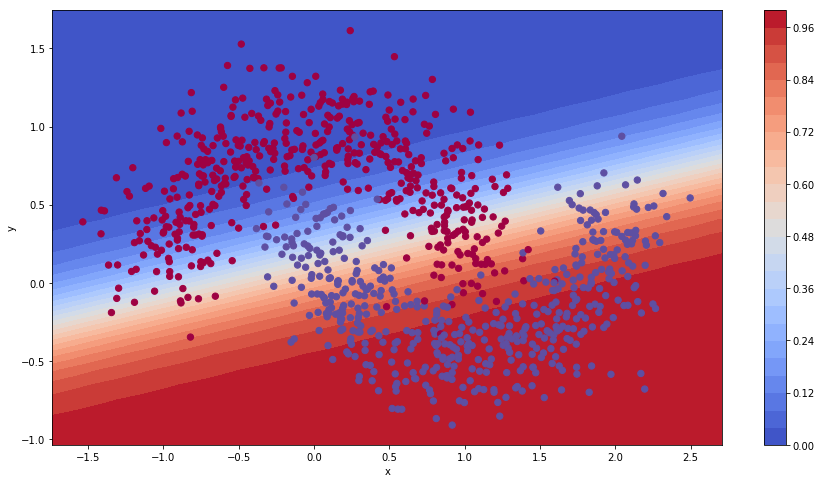

In [36]:


def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize=(15, 8))   
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, np.array(X), pred_fun)
#plot_data(x_train, y_train)
plt.scatter(X.X1, X.X2, c=Y.Y, s=40, cmap=plt.cm.Spectral)